In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set_theme()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\thega\\Documents\\CarPrice Prediction\\data\\car_dataset.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       201 non-null    int64  
 1   Unnamed: 0         201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [5]:
df['diesel'].value_counts()

diesel
0    181
1     20
Name: count, dtype: int64

Columns to drop: 

- Diesel: because it contains almost same data as gas, just telling whether the car uses diesel or not while gas tells whether the car uses pms or not. the 0 entries in one are the 1 entries in the other. 
- Unnamed 0
- Unnamed 0.1 

In [6]:
df['normalized-losses']

0      122
1      122
2      122
3      164
4      164
      ... 
196     95
197     95
198     95
199     95
200     95
Name: normalized-losses, Length: 201, dtype: int64

<Axes: >

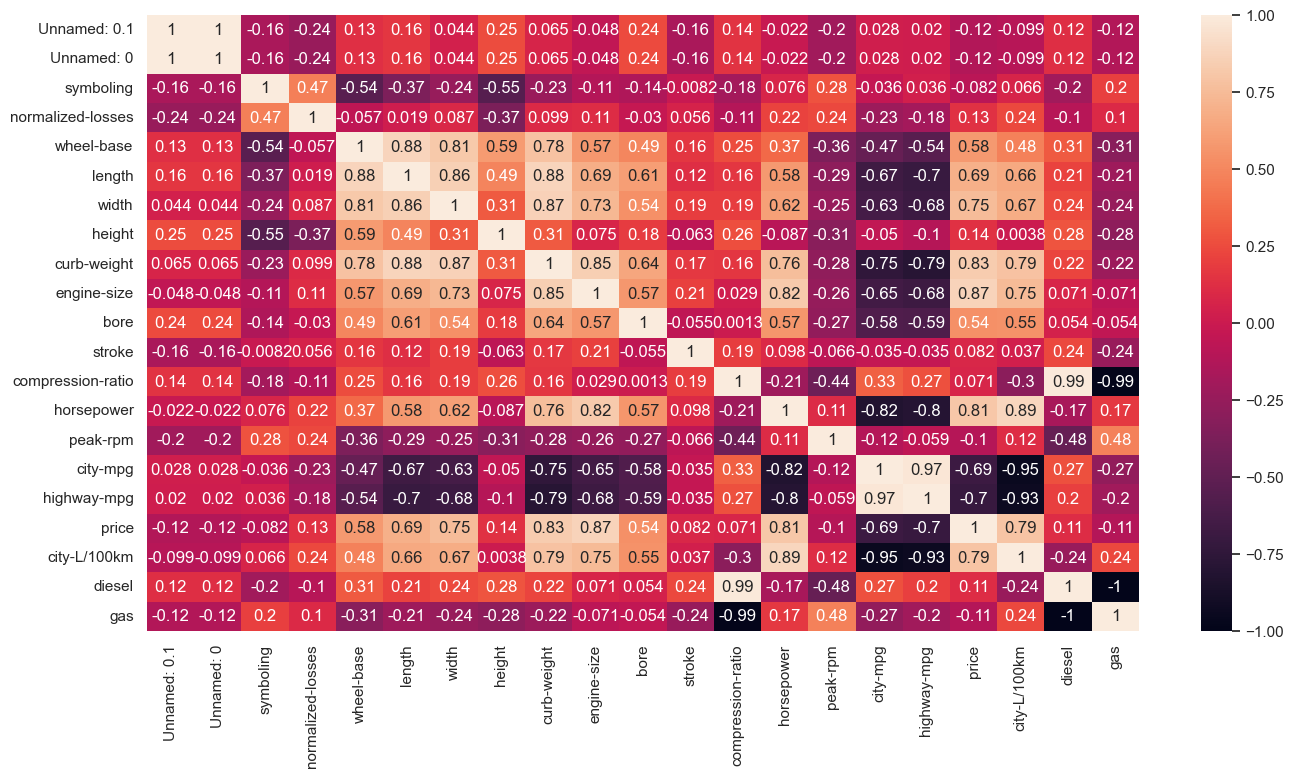

In [7]:
plt.figure(figsize = (16,8))
sns.heatmap(df[df.select_dtypes(include=['int64', 'float64']).columns].corr(), annot = True)

In [8]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'diesel'], axis = 1)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,0


In [9]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [10]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [11]:
df[df['make'] == 'toyota'].describe()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,161.500000,161.500000,0.562500,110.656250,98.103125,0.826210,0.904036,53.721875,2441.093750,118.812500,3.280000,3.255000,10.340625,92.781250,4859.375000,27.500000,32.906250,9885.812500,8.809836,0.093750,0.906250
std,9.380832,9.380832,1.216486,40.111626,3.349096,0.036124,0.017728,2.003019,354.510599,27.161925,0.186236,0.217582,3.978641,32.966977,530.282563,4.812618,5.549539,3204.982114,1.602225,0.296145,0.296145
min,146.000000,146.000000,-1.000000,65.000000,94.500000,0.762614,0.883333,52.000000,1985.000000,92.000000,3.050000,3.030000,8.700000,56.000000,4200.000000,19.000000,24.000000,5348.000000,6.184211,0.000000,0.000000
25%,153.750000,153.750000,0.000000,85.500000,95.700000,0.799135,0.888889,52.600000,2161.750000,98.000000,3.190000,3.030000,9.000000,68.000000,4800.000000,24.000000,30.000000,7870.500000,7.833333,0.000000,1.000000
50%,161.500000,161.500000,0.000000,91.000000,95.700000,0.815473,0.894444,53.000000,2313.000000,110.000000,3.270000,3.350000,9.000000,82.500000,4800.000000,27.000000,32.000000,9103.000000,8.703704,0.000000,1.000000
75%,169.250000,169.250000,1.250000,134.000000,102.400000,0.846708,0.923611,54.500000,2583.000000,146.000000,3.310000,3.500000,9.300000,116.000000,4800.000000,30.000000,36.250000,10973.250000,9.791667,0.000000,1.000000
max,177.000000,177.000000,3.000000,197.000000,104.500000,0.902451,0.940278,59.100000,3151.000000,171.000000,3.620000,3.540000,22.500000,161.000000,6600.000000,38.000000,47.000000,17669.000000,12.368421,1.000000,1.000000


In [12]:
sel_df = df[['wheel-base', 'length', 'width', 
            'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 
            'bore', 'price']]

In [13]:
sel_df

,wheel-base,length,width,curb-weight,engine-size,horsepower,city-L/100km,bore,price
0,88.6,0.811148,0.890278,2548,130,111.0,11.190476,3.47,13495.0
1,88.6,0.811148,0.890278,2548,130,111.0,11.190476,3.47,16500.0
2,94.5,0.822681,0.909722,2823,152,154.0,12.368421,2.68,16500.0
3,99.8,0.848630,0.919444,2337,109,102.0,9.791667,3.19,13950.0
4,99.4,0.848630,0.922222,2824,136,115.0,13.055556,3.19,17450.0
...,...,...,...,...,...,...,...,...,...
196,109.1,0.907256,0.956944,2952,141,114.0,10.217391,3.78,16845.0
197,109.1,0.907256,0.955556,3049,141,160.0,12.368421,3.78,19045.0
198,109.1,0.907256,0.956944,3012,173,134.0,13.055556,3.58,21485.0
199,109.1,0.907256,0.956944,3217,145,106.0,9.038462,3.01,22470.0


In [14]:
df['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64

In [15]:
doors_dict = {'four': 4, 'two': 2}
sel_df['num-doors'] = [doors_dict.get(i) for i in df['num-of-doors']]

In [16]:
cyl_dict = {'four': 4, 'five':5, 'six': 6, 'two':2, 'three':3, 'eight':8, 'twelve': 12}
sel_df['num-cylinders'] = [cyl_dict.get(i) for i in df['num-of-cylinders']]
sel_df

,wheel-base,length,width,curb-weight,engine-size,horsepower,city-L/100km,bore,price,num-doors,num-cylinders
0,88.6,0.811148,0.890278,2548,130,111.0,11.190476,3.47,13495.0,2,4
1,88.6,0.811148,0.890278,2548,130,111.0,11.190476,3.47,16500.0,2,4
2,94.5,0.822681,0.909722,2823,152,154.0,12.368421,2.68,16500.0,2,6
3,99.8,0.848630,0.919444,2337,109,102.0,9.791667,3.19,13950.0,4,4
4,99.4,0.848630,0.922222,2824,136,115.0,13.055556,3.19,17450.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...
196,109.1,0.907256,0.956944,2952,141,114.0,10.217391,3.78,16845.0,4,4
197,109.1,0.907256,0.955556,3049,141,160.0,12.368421,3.78,19045.0,4,4
198,109.1,0.907256,0.956944,3012,173,134.0,13.055556,3.58,21485.0,4,6
199,109.1,0.907256,0.956944,3217,145,106.0,9.038462,3.01,22470.0,4,6


<Axes: >

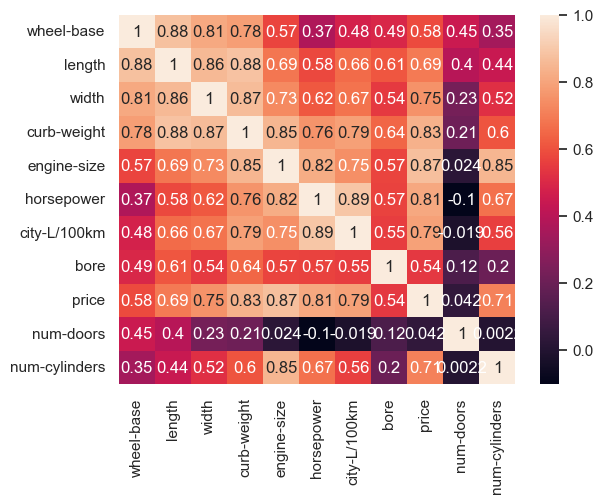

In [17]:
sns.heatmap(sel_df.corr(), annot = True) 

In [18]:
sel_df.drop(['num-doors', 'bore'], axis = 1, inplace = True)

In [19]:
X = sel_df.drop('price', axis = 1)
y = sel_df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [20]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre.fit(X_train, y_train)

LinearRegression()

In [21]:
price_pred = lre.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,auc, roc_auc_score, root_mean_squared_error, mean_squared_error, mean_absolute_error
print(f'MAE: {mean_absolute_error(y_test, price_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, price_pred)}')
print(f'MSE: {mean_squared_error(y_test, price_pred)}')

from sklearn.metrics import r2_score
print(f'R2_score: {r2_score(y_test, price_pred)}')


MAE: 1904.5345806768853
RMSE: 2606.7524445896383
MSE: 6795158.3073740555
R2_score: 0.7952782977424643


In [23]:
d = {'Predictions': price_pred, 'Actual':y_test}
pd.DataFrame(data = d)

,Predictions,Actual
39,8437.429621,10295.0
34,6965.681129,7295.0
61,11510.882805,11245.0
54,8761.397113,13645.0
74,6633.348703,6189.0
200,18034.265917,22625.0
80,18536.685366,14869.0
169,11791.721761,8948.0
37,9911.390757,9095.0
166,15015.436455,11199.0


In [24]:
lre.intercept_

-42207.91672848933

In [25]:
d = {'column': X_train.columns, 'coef':lre.coef_}
pd.DataFrame(data = d)

,column,coef
0,wheel-base,101.949024
1,length,-8992.883161
2,width,32523.464397
3,curb-weight,1.048931
4,engine-size,84.867984
5,horsepower,39.462657
6,city-L/100km,420.428206
7,num-cylinders,319.563924


### Version 2: Working with scaled data.

In [26]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [28]:
X_scaled_train = st_scaler.fit_transform(X_train)
X_scaled_test = st_scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre.fit(X_scaled_train, y_train)

LinearRegression()

In [30]:
price_scaled_pred = lre.predict(X_scaled_test)
from sklearn.metrics import accuracy_score, root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
print(f'MAE: {mean_absolute_error(y_test, price_scaled_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, price_scaled_pred)}')
print(f'MSE: {mean_squared_error(y_test, price_scaled_pred)}')
print(f'R2_score: {r2_score(y_test, price_scaled_pred)}')


MAE: 1904.5345806767014
RMSE: 2606.7524445894637
MSE: 6795158.307373146
R2_score: 0.7952782977424917


### Random forest with scaled data

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_scaled_train, y_train)

RandomForestRegressor()

In [32]:
rfr_scaled_pred = rfr.predict(X_scaled_test)

print(f'MAE: {mean_absolute_error(y_test, rfr_scaled_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, rfr_scaled_pred)}')
print(f'MSE: {mean_squared_error(y_test, rfr_scaled_pred)}')
print(f'R2_score: {r2_score(y_test, rfr_scaled_pred)}')


MAE: 1128.3969715447156
RMSE: 1501.8087496369599
MSE: 2255429.5204861285
R2_score: 0.9320493578119077


In [33]:
d = {'Predictions': rfr_scaled_pred, 'Actual':y_test}
pd.DataFrame(data = d)

,Predictions,Actual
39,9497.110000,10295.0
34,7301.790000,7295.0
61,9594.135833,11245.0
54,11298.390000,13645.0
74,6522.120000,6189.0
200,18151.380000,22625.0
80,14204.260000,14869.0
169,10734.200000,8948.0
37,8425.950000,9095.0
166,12516.420000,11199.0


### Random forest without the scaled data

In [34]:
rfr_unscaled = RandomForestRegressor()
rfr_unscaled.fit(X_train, y_train)
rfr_unscaled_pred = rfr_unscaled.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, rfr_unscaled_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, rfr_unscaled_pred)}')
print(f'MSE: {mean_squared_error(y_test, rfr_unscaled_pred)}')
print(f'R2_score: {r2_score(y_test, rfr_unscaled_pred)}')

from joblib import load, dump
dump(rfr_unscaled, 'artifacts/rfr_predictor.joblib' )

MAE: 1150.3372154471544
RMSE: 1497.0782408539405
MSE: 2241243.2592383293
R2_score: 0.9324767555883756


['artifacts/rfr_predictor.joblib']

In [35]:
model = load('artifacts/rfr_predictor.joblib')

In [40]:
model_pred = model.predict(X_test)

In [41]:
print(f'MAE: {mean_absolute_error(y_test, model_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, model_pred)}')
print(f'MSE: {mean_squared_error(y_test, model_pred)}')
print(f'R2_score: {r2_score(y_test, model_pred)}')

MAE: 1150.3372154471544
RMSE: 1497.0782408539405
MSE: 2241243.2592383293
R2_score: 0.9324767555883756
